In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    object 
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [4]:
df["label"], labels = df["survived"].factorize()
df["sex_i"], sexes = df["sex"].factorize()
df["age_m"] = df["age"].fillna(df["age"].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    object 
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   embarked  889 non-null    object 
 10  label     891 non-null    int64  
 11  sex_i     891 non-null    int64  
 12  age_m     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [5]:
labels, sexes

(Index(['no', 'yes'], dtype='object'),
 Index(['male', 'female'], dtype='object'))

In [ ]:
model = TSNE(n_components=2)

In [7]:
Xs = df[["pclass", "age_m", "parch", "fare", "sex_i"]]
Xs_embedded = model.fit_transform(Xs)

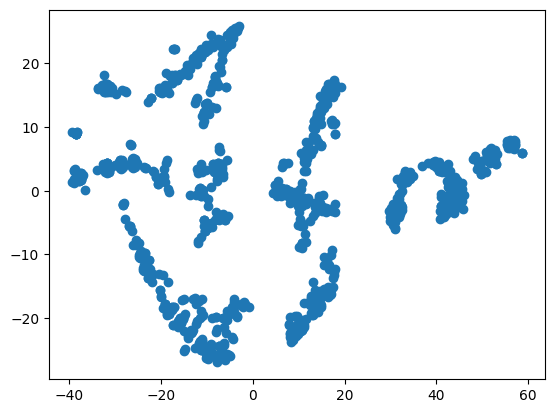

In [9]:
plt.scatter(*Xs_embedded.T)

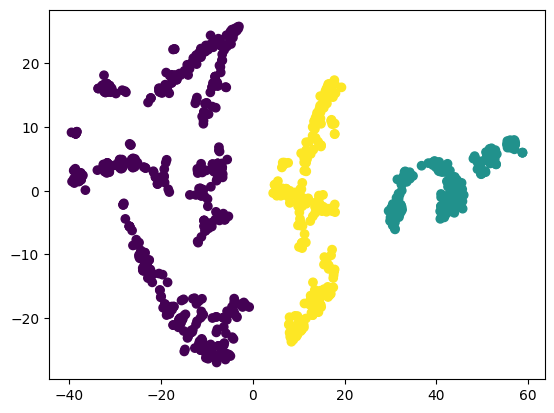

In [10]:
from sklearn.cluster import DBSCAN

labels = DBSCAN(eps=7.5).fit_predict(Xs_embedded)
plt.scatter(*Xs_embedded.T, c=labels)

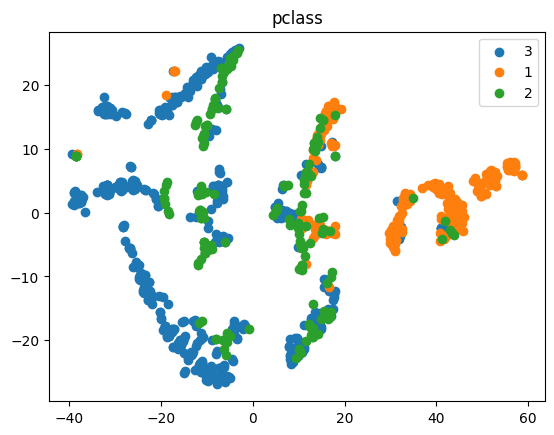

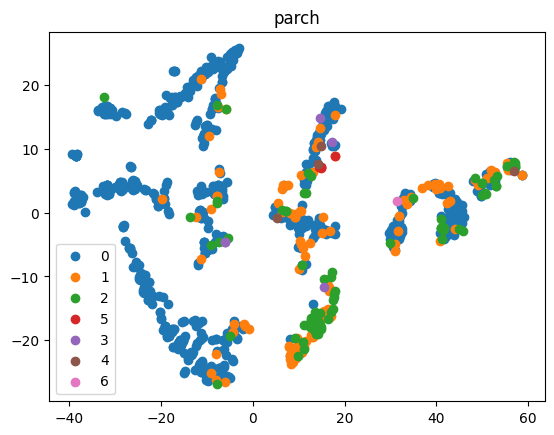

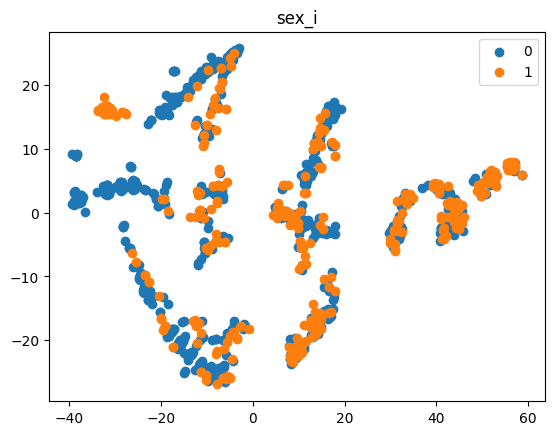

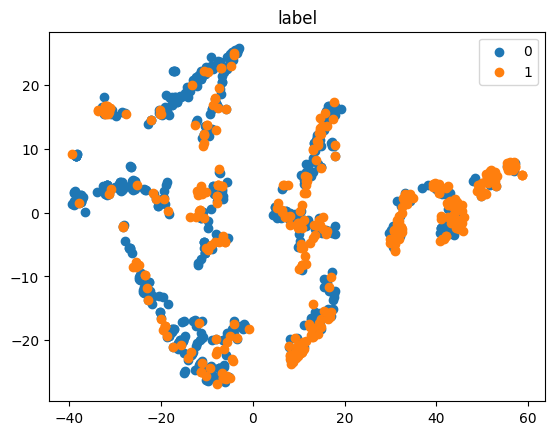

In [ ]:
for col_name in ["pclass", "parch", "sex_i", "label"]:
    for col in df[col_name].unique():
        X_embedded = Xs_embedded[df[col_name] == col]
        plt.scatter(*X_embedded.T, label=col)
    plt.title(col_name)
    plt.legend()
    plt.show()

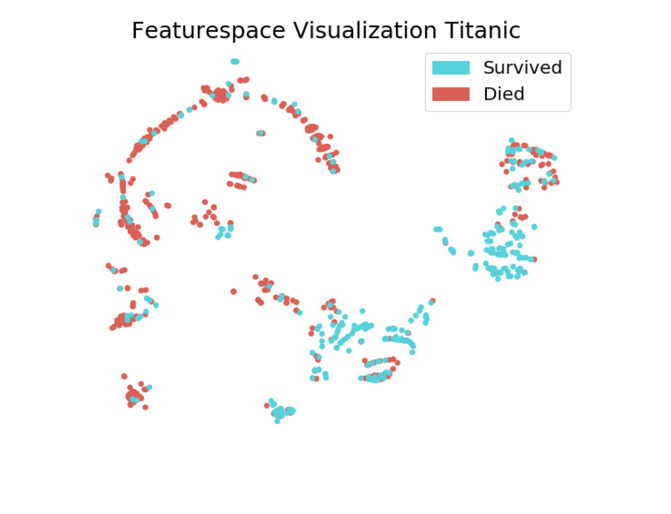

In [12]:
# https://www.liip.ch/en/blog/the-magic-of-tsne-for-visualizing-your-data-features
from IPython.display import Image

Image(filename="tsne-titanic.png")

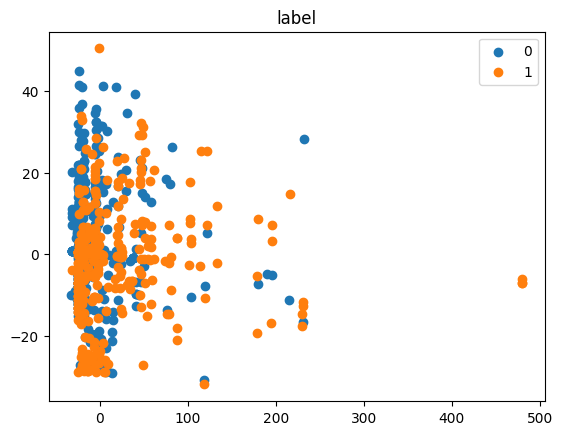

In [ ]:
model = PCA(n_components=2)
Xs_embedded = model.fit_transform(Xs)

for col in df["label"].unique():
    X_embedded = Xs_embedded[df["label"] == col]
    plt.scatter(*X_embedded.T, label=col)
plt.title("label")
plt.legend()
plt.show()